In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objs as go
import plotly
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore')
import os

In [2]:
imp_path = 'https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Import%20and%20Export%20Data%20of%20Pakistan/Stripped%20imports.csv'
exp_path = 'https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Import%20and%20Export%20Data%20of%20Pakistan/Stripped%20exports.csv'

imp_df = pd.read_csv(imp_path)
exp_df = pd.read_csv(exp_path)

In [3]:
print('Pakistan is importing from',len(imp_df['Country'].unique()),'different countries.')
print('Pakistan is exportting to',len(exp_df['Country'].unique()),'different countries.')

print('Pakistan is importing',len(imp_df['Commodity'].unique()),'different items.')
print('Pakistan is exporting',len(exp_df['Commodity'].unique()),'different items.')

Pakistan is importing from 243 different countries.
Pakistan is exportting to 221 different countries.
Pakistan is importing 6802 different items.
Pakistan is exporting 5202 different items.


In [4]:
df = pd.DataFrame(exp_df['Country'].value_counts())
df2 = pd.DataFrame(exp_df['Commodity'].value_counts())
print(df.head(5))
df2.head(5)

                      Country
United Arab Emirates     8712
U.S.America              6631
United Kingdom           6312
Germany                  5223
Saudi Arabia             4822


,Commodity
"OTH INST,APP MEDICAL/SUR/VETEN",852
FOOTBALLS,732
TOWELS OF COTTON MILL-MADE,612
GLOVES/MITTENS LEATHER SPORTS,561
RICE OTHER VARIETIES,524


In [5]:
df = imp_df.groupby(['Year']).agg(Value = ('Value','sum'))
df2 = exp_df.groupby(['Year']).agg(Value= ('Value','sum'))

pd.set_option('float_format','{:.0f}'.format)

df['Deficit'] = df2.Value - df.Value
print(df['Value'])
print(df2)
print(df['Deficit'])

Year
2015    5111198482
2016    5145484787
2017    6036208532
2018    7404982413
2019    4240297685
Name: Value, dtype: int64
          Value
Year           
2015 2603418072
2016 2359921494
2017 2163982890
2018 2817331646
2019 3454846319
Year
2015   -2507780410
2016   -2785563293
2017   -3872225642
2018   -4587650767
2019    -785451366
Name: Deficit, dtype: float64


In [6]:

t1 = go.Bar( x = df.index, 
                 y =df.Value, 
                 name = 'Import',
                 marker = dict(color='rgba(0,10,170,1)', 
                 line = dict(color='rgb(0,0,0)', width = 1.5)),
                 text = df.Value
               )

t2 = go.Bar(x = df2.index,
                y = df2.Value,
                name = 'Export',
                marker = dict(color = 'rgba(1,200,10,1)',
                line = dict(color = 'rgb(0,0,0)',
                width = 1.5)),
                text = df2.Value)

t3 = go.Bar(x = df.index,
                y = df.Deficit,
                name = 'Trade Deficit',
                marker = dict(color = 'rgba(220,10,10,1)',
                line = dict(color = 'rgb(0,0,0)',
                width = 1.5)),
                text = df.Deficit)

data = [t1, t2, t3]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data=data, layout = layout)
fig.update_layout(title = go.layout.Title(text = 'Import, Export and Defecit (Yearwise) X 10',
                                            xref = 'paper',
                                            x = 0),
                 xaxis = go.layout.XAxis(title = go.layout.xaxis.Title(
                                                                        text = 'Year',
                                                                        font = dict
                                                                        (
                                                                            family = 'Courier New, monospace',
                                                                            size = 18,
                                                                            color = '#7f7f7f'
                                                                        )
                                                                      )
                                        ),
                 yaxis = go.layout.YAxis(
                                             title = go.layout.yaxis.Title
                                             (
                                             text = 'Value',
                                             font = dict
                                                     (
                                                         family = 'Courier New, monospace',
                                                         size = 18,
                                                         color = '#7f7f7f'
                                                     )
                                             )
                                        )
                 )
fig.show()

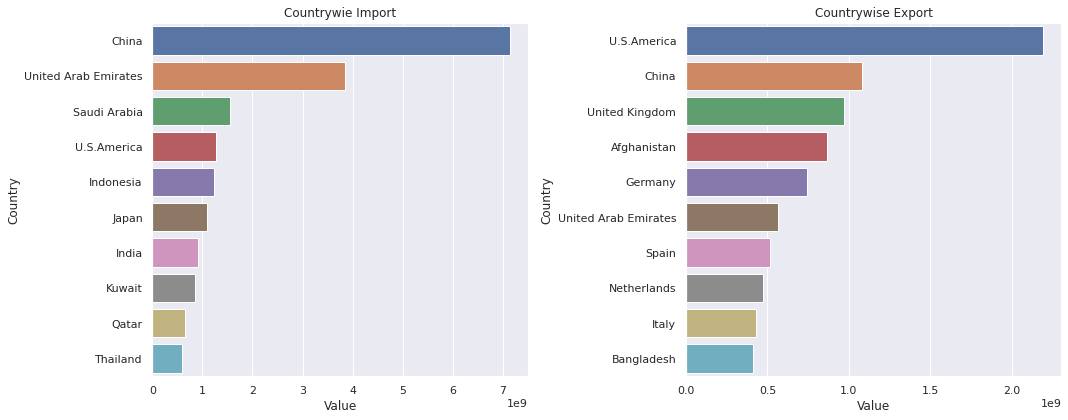

In [7]:

df3 = imp_df.groupby(['Country']).agg(Value = ('Value','sum'))
df3 = df3.sort_values(by='Value', ascending = False)
df3 = df3[:10]

df4 = exp_df.groupby(['Country']).agg(Value = ('Value','sum'))
df4 = df4.sort_values(by = 'Value', ascending = False)
df4 = df4[:10]

sns.set(rc={'figure.figsize':(15,6)})
axis1 = plt.subplot(121)

sns.barplot(df3.Value, df3.index).set_title('Countrywie Import')

axis2 = plt.subplot(122)
sns.barplot(df4.Value, df4.index).set_title('Countrywise Export')

plt.tight_layout()
plt.show()

In [8]:

fig = go.Figure()

fig.add_trace(go.Scatter(
                         x=df.index, y= df.Value, 
                         name = 'Import', mode = 'lines+markers',
                          marker = dict(size=8),
                         line = dict(color = 'crimson', width = 1)))

fig.add_trace(go.Scatter(
                        x=df2.index, y=df2.Value, 
                        name = 'Export', mode = 'lines+markers',
                        line = dict(color='blue', width = 1)))

fig.update_layout(title = go.layout.Title(
                        text = 'Yearwise Import/Export',
                        xref = 'paper', 
                        x= 0),
                  xaxis = go.layout.XAxis
                    (
                      title = go.layout.xaxis.Title
                      (
                          text = 'Year',
                          font = dict
                          (
                                      family = 'Courier New, monospace',
                                      size = 18,
                                      color = '#7f7f7f'
                          )
                      )
                  ),
                  yaxis = go.layout.YAxis(
                          title = go.layout.yaxis.Title(
                              text = 'Value',
                              font = dict(
                                          family = 'Courier New, monospace',
                                          size = 18,
                                          color = '#7f7f7f'
                              )
                          )
                      )
                 )
fig.show()

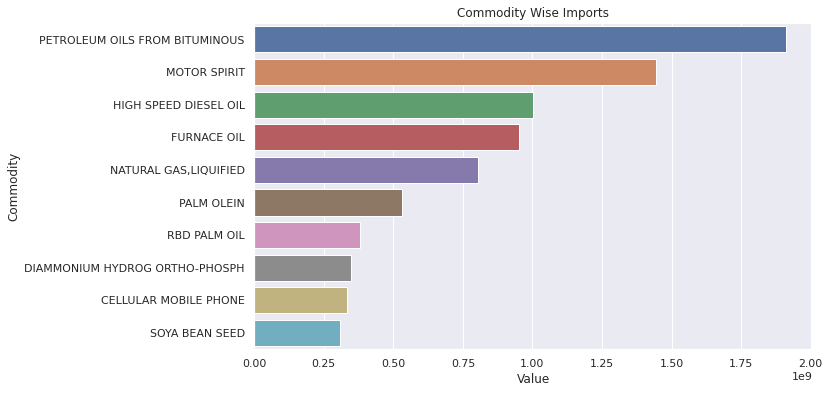

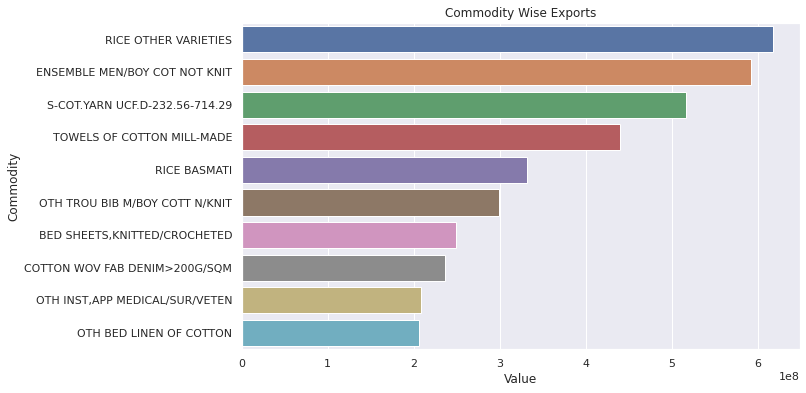

In [9]:
df = imp_df.groupby(['Commodity']).agg(Value=('Value','sum'))
df = df.sort_values(by='Value', ascending = False)
df = df[:10]

df2 = exp_df.groupby(['Commodity']).agg(Value=('Value','sum'))
df2 = df2.sort_values(by='Value', ascending=False)
df2 = df2[:10]

sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(df.Value, df.index).set_title('Commodity Wise Imports')
plt.show()

sns.barplot(df2.Value, df2.index).set_title('Commodity Wise Exports')
plt.show()

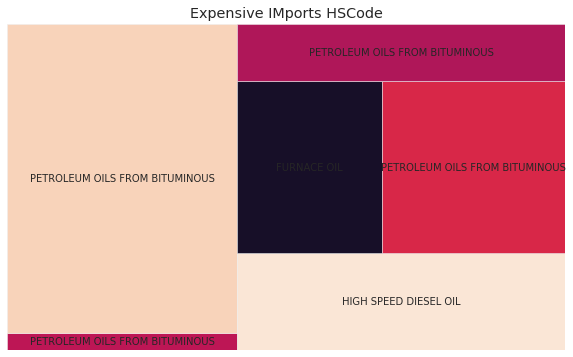

In [10]:
expensive_imports = imp_df[imp_df.Value>100000000]

expensive_exports = exp_df[exp_df.Value>10000000]
df = expensive_imports.groupby(['HSCode']).agg(Value=('Value','sum'))

value = np.array(df)
commodityCode = expensive_imports.Commodity
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0,6.0)
squarify.plot(sizes = value, label=commodityCode, alpha=1.0)
plt.axis('off')
plt.title('Expensive IMports HSCode')
plt.show()

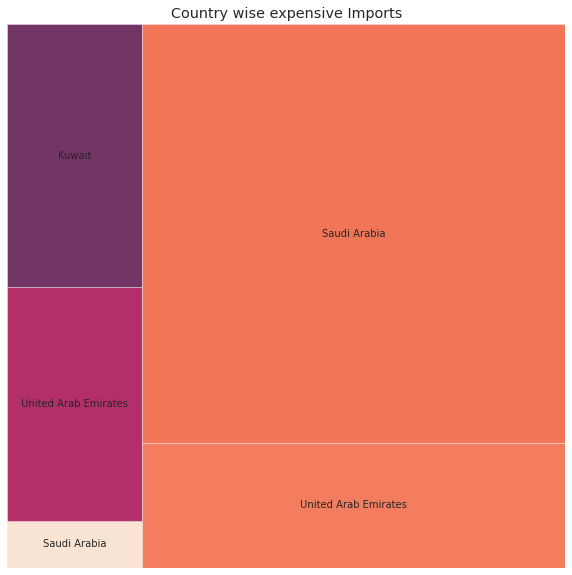

In [11]:
df1 = expensive_imports.groupby(['Country']).agg(Value = ('Value', 'sum'))
df1 = df1.sort_values(by = 'Value')

value = np.array(df1)
country = expensive_imports['Country']
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes = value, label = country, alpha=0.9)
plt.title('Country wise expensive Imports')
plt.axis('off')
plt.show()

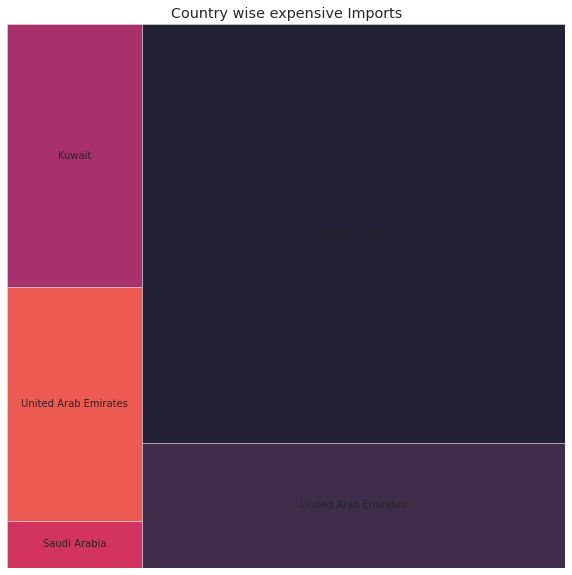

In [12]:
df1 = expensive_imports.groupby(['Country']).agg(Value = ('Value', 'sum'))
df1 = df1.sort_values(by = 'Value')

value = np.array(df1)
country = expensive_imports['Country']
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes = value, label = country, alpha=0.9)
plt.title('Country wise expensive Imports')
plt.axis('off')
plt.show()

In [13]:
dat2 = exp_df.loc[exp_df['Year'] == 2018]
data = dat2.groupby('Country')['Value'].sum().reset_index()
data['Parents'] = ''
fig = go.Figure(go.Treemap(
    labels = data['Country'],
    parents = data['Parents'],
    values = data['Value'],
    marker_colorscale = 'Rainbow' 
))
fig.show()

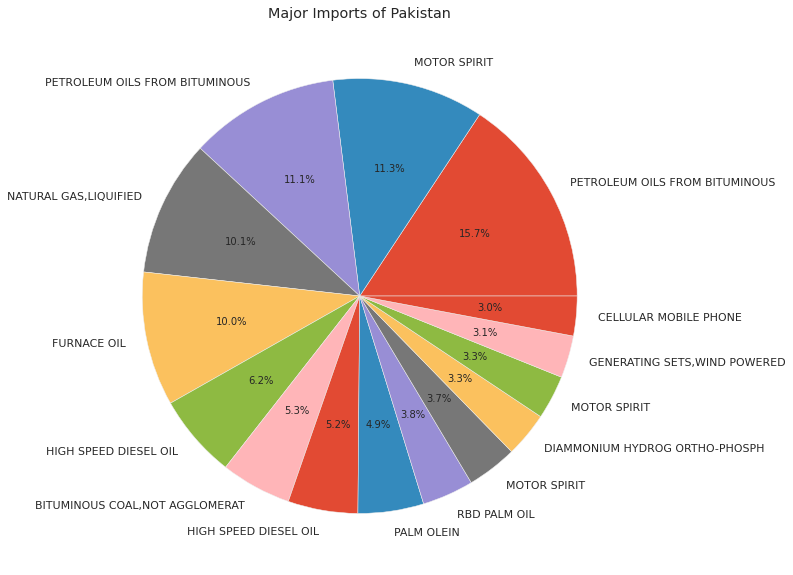

In [14]:
plot = plt.pie(imp_df[imp_df['Year'] == 2018]['Value'].sort_values(ascending=False)[0:15], 
              labels=imp_df[imp_df['Year']==2018].sort_values(by='Value', ascending = False)
              ['Commodity'][0:15], autopct='%1.1f%%')
plt.title('Major Imports of Pakistan')
plt.show()